
# Task 6 : Prediction using Decision Tree Algorithm


## Author:- Arpit Rawat

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

### Importing and Analyzing the data

In [24]:
data=pd.read_csv('iris.csv')

In [25]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Visualization

In [ ]:
X=pd.DataFrame(data,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
y=pd.DataFrame(data,columns=['Species'])

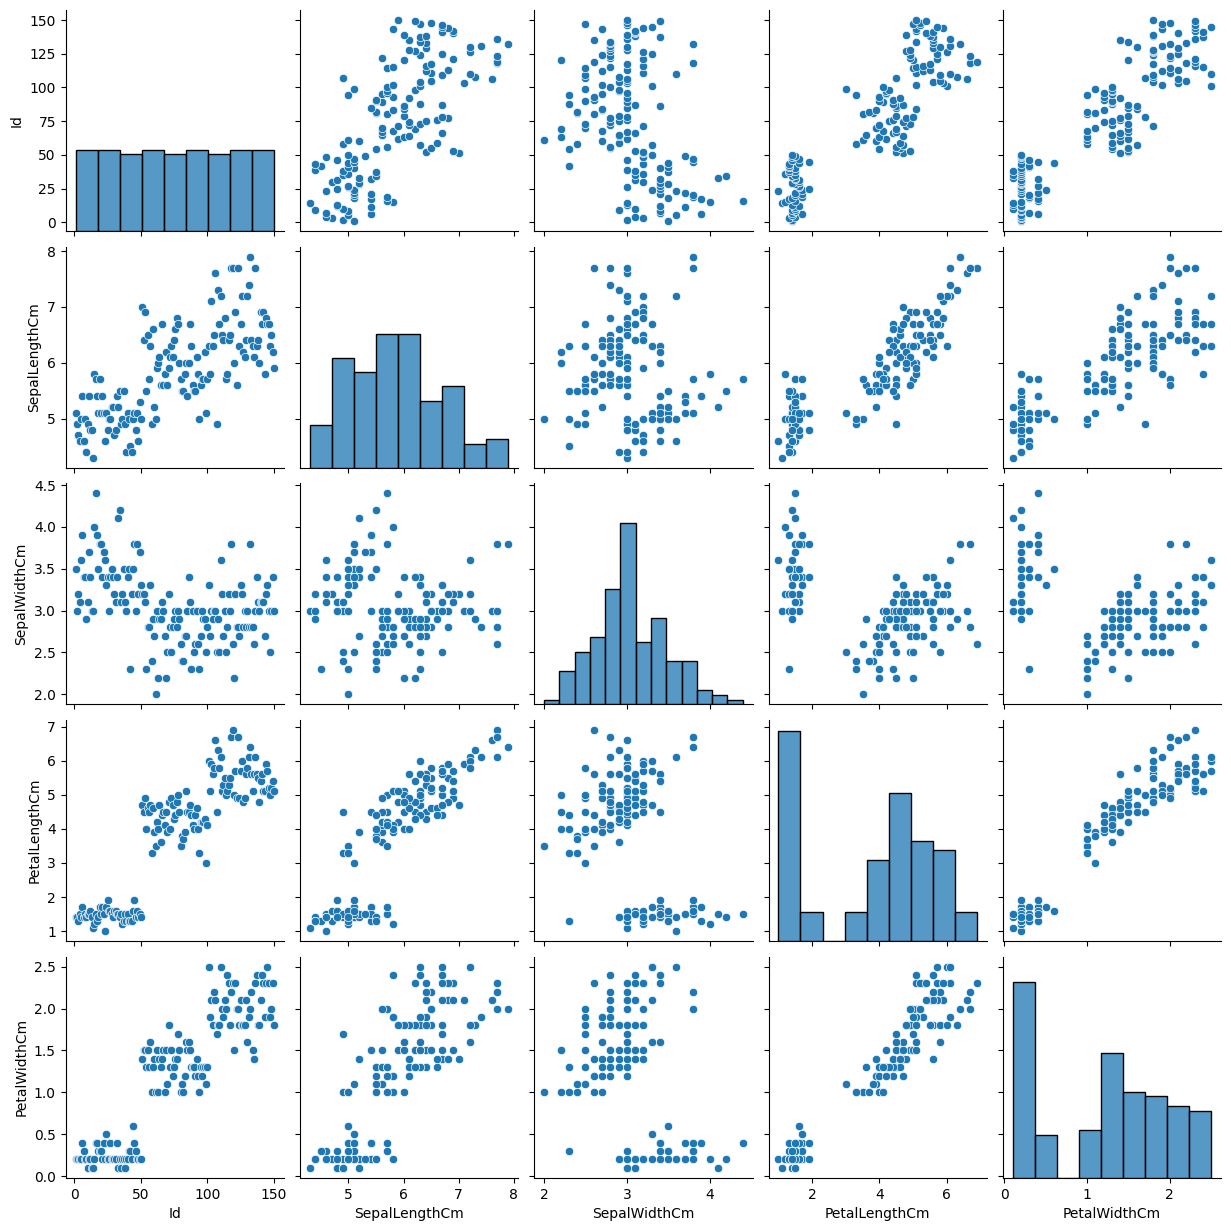

In [30]:
sns.pairplot(data=data)
plt.show()

# Decision Tree Model Training

In [31]:
 X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [32]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,6.5,3.0,5.8,2.2
82,5.8,2.7,3.9,1.2
35,5.0,3.2,1.2,0.2
9,4.9,3.1,1.5,0.1
77,6.7,3.0,5.0,1.7
...,...,...,...,...
47,4.6,3.2,1.4,0.2
44,5.1,3.8,1.9,0.4
108,6.7,2.5,5.8,1.8
110,6.5,3.2,5.1,2.0


In [33]:
y_test

,Species
73,Iris-versicolor
20,Iris-setosa
24,Iris-setosa
79,Iris-versicolor
25,Iris-setosa
81,Iris-versicolor
125,Iris-virginica
16,Iris-setosa
105,Iris-virginica
67,Iris-versicolor


In [34]:
dt=DecisionTreeClassifier()

In [50]:
dt.fit(X_train.values,y_train)

DecisionTreeClassifier()

### Visualizing the decision tree

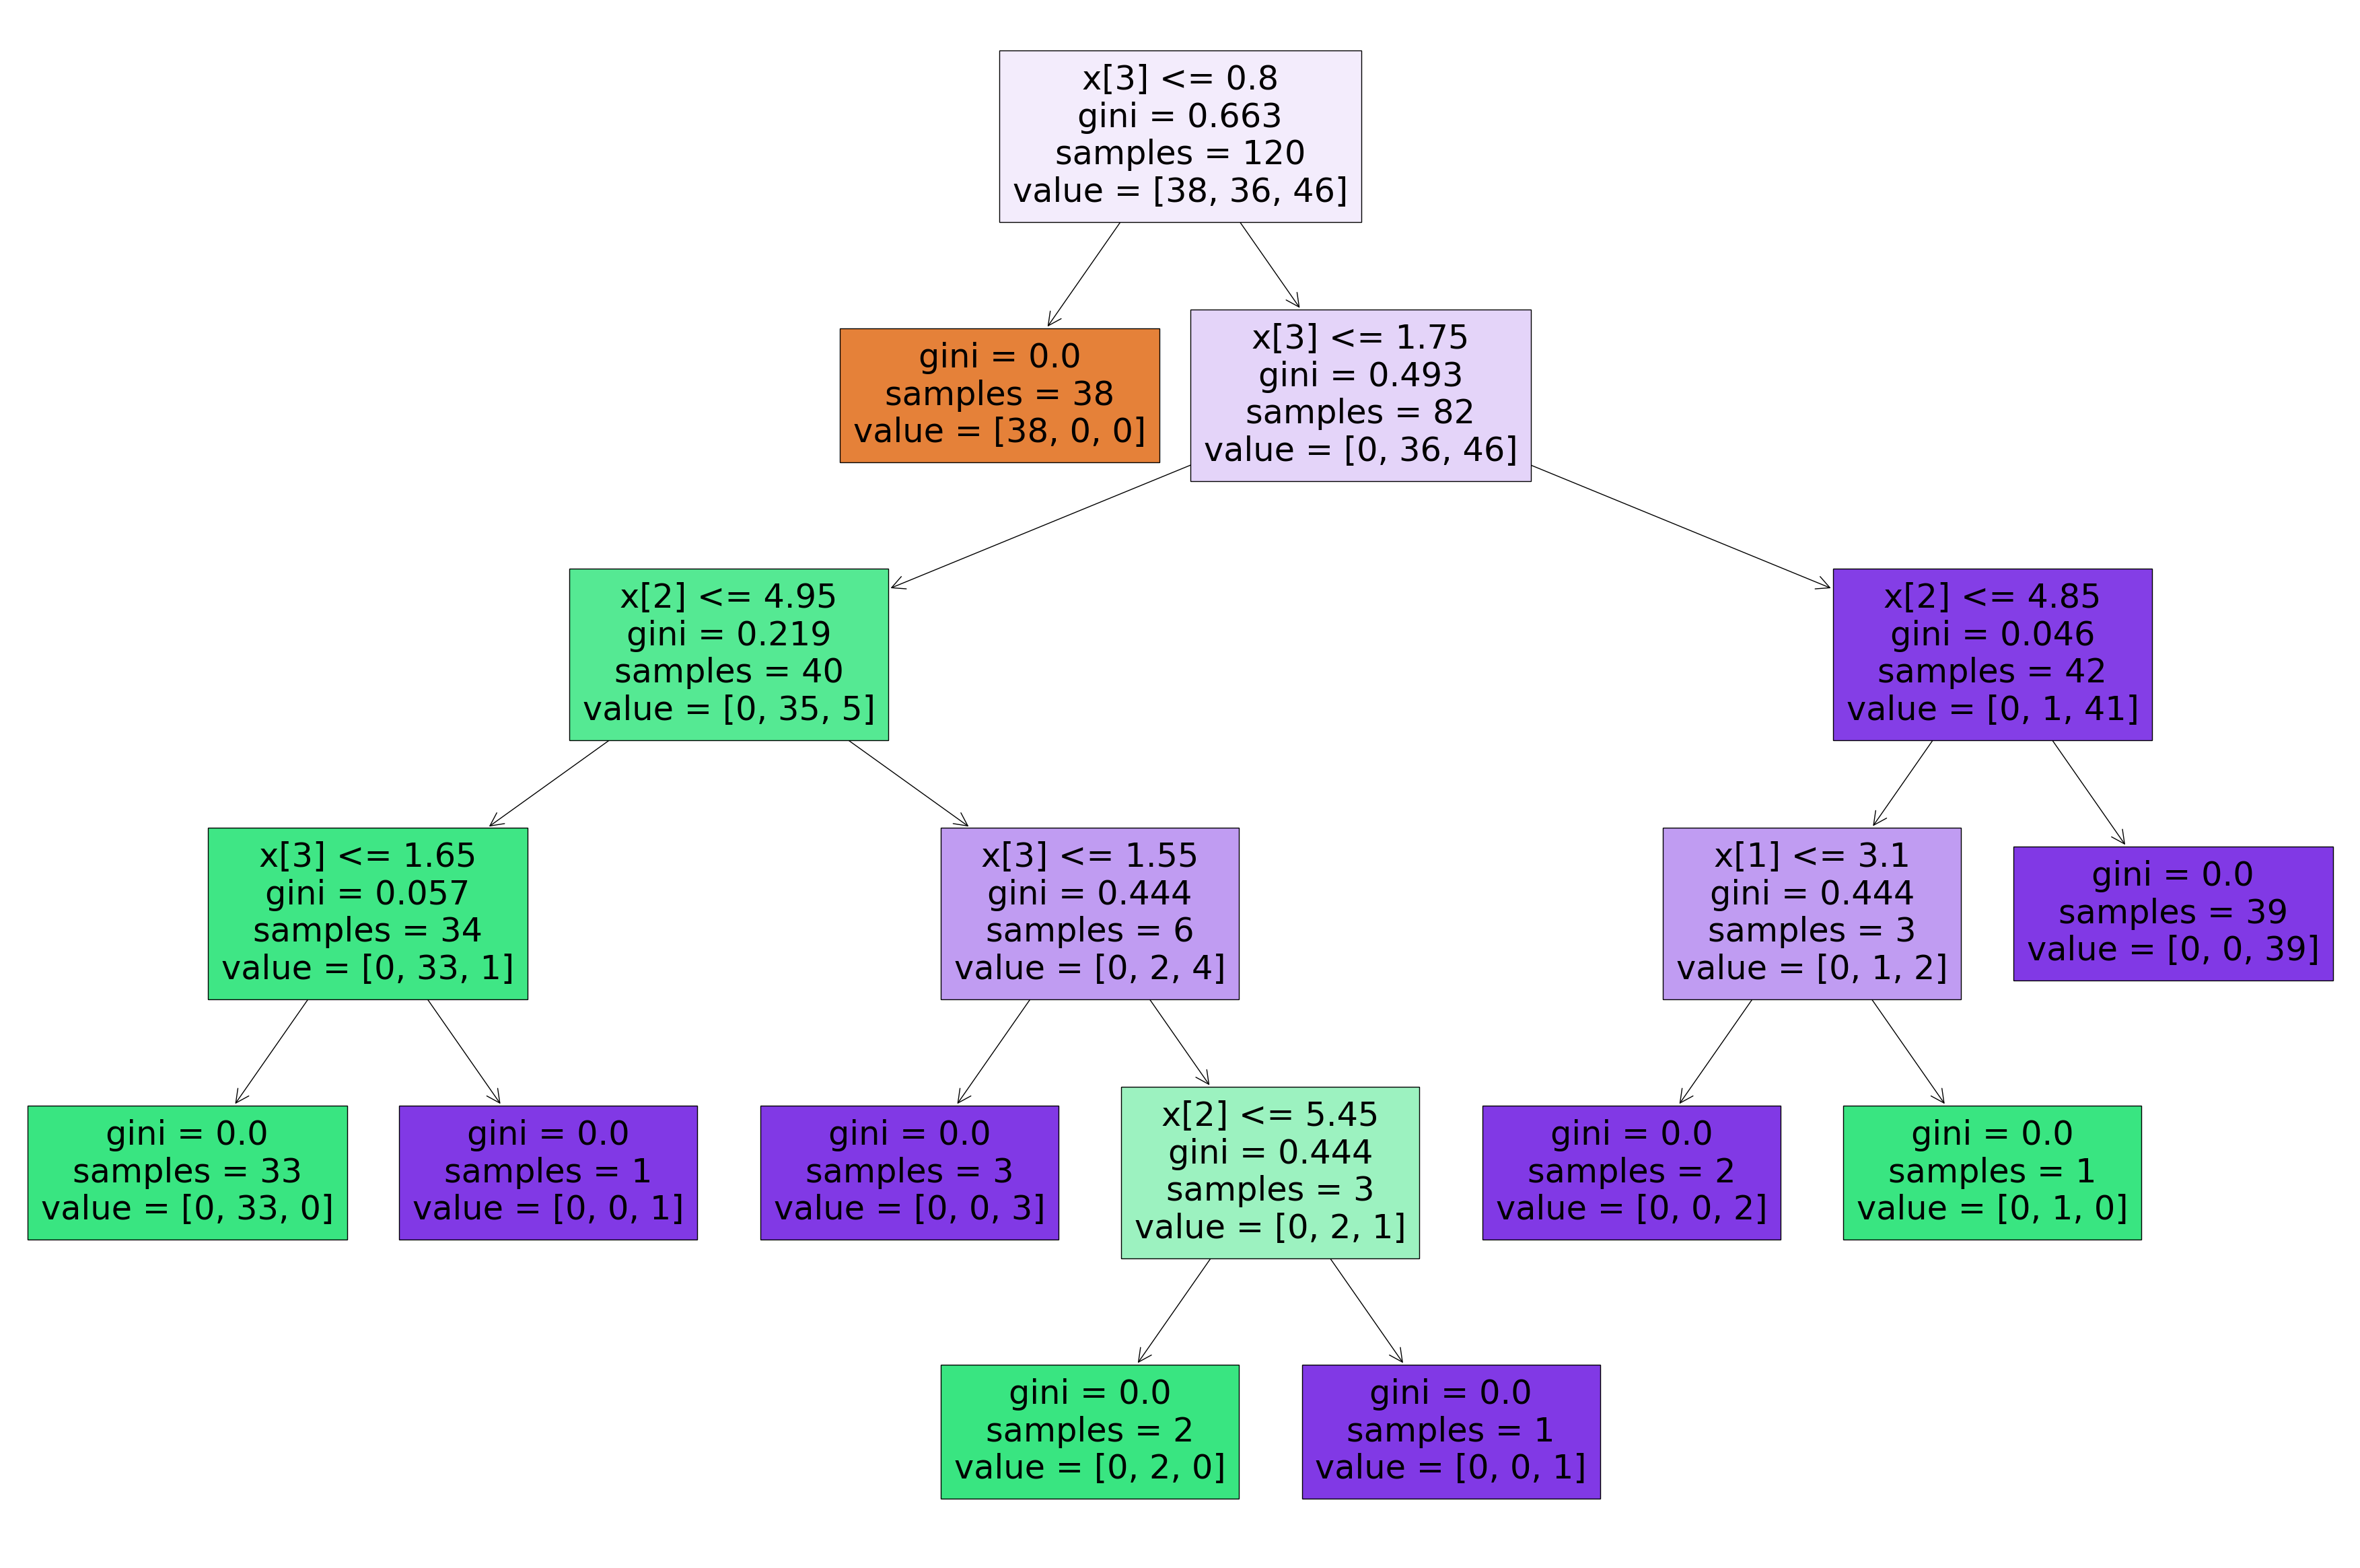

In [36]:
fig = plt.figure(figsize=(45,30))
tree.plot_tree(dt,filled=True)
plt.show()

In [37]:
print("The score on the testing data is",dt.score(X_test,y_test))
print("The score on the training data is",dt.score(X_train,y_train))

The score on the testing data is 1.0
The score on the training data is 1.0


### Making predictions

In [49]:
y_pred=dt.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor']


In [39]:
# creating a prediction function
def pred_class(SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm):
    return dt.predict([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])[0]

In [40]:
#Example
SepalLengthCm=3.0
SepalWidthCm=3.2
PetalLengthCm=2.0
PetalWidthCm=5.0

In [51]:
prediction=pred_class(SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm)
print("The predicted class is",prediction)

The predicted class is Iris-setosa


# Model Accuracy

In [45]:
import sklearn.metrics as sm
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0
